In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

In [3]:
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from scipy.stats import skew,boxcox_normmax
from scipy.special import boxcox1p

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [5]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor ,StackingRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
import xgboost as xgb

In [6]:
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_rows', 5000)
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use("fivethirtyeight")

In [7]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample_sub=pd.read_csv('sample_submission.csv')

In [8]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [9]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [10]:
#basic stats
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [11]:
train.describe(include = "O")

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

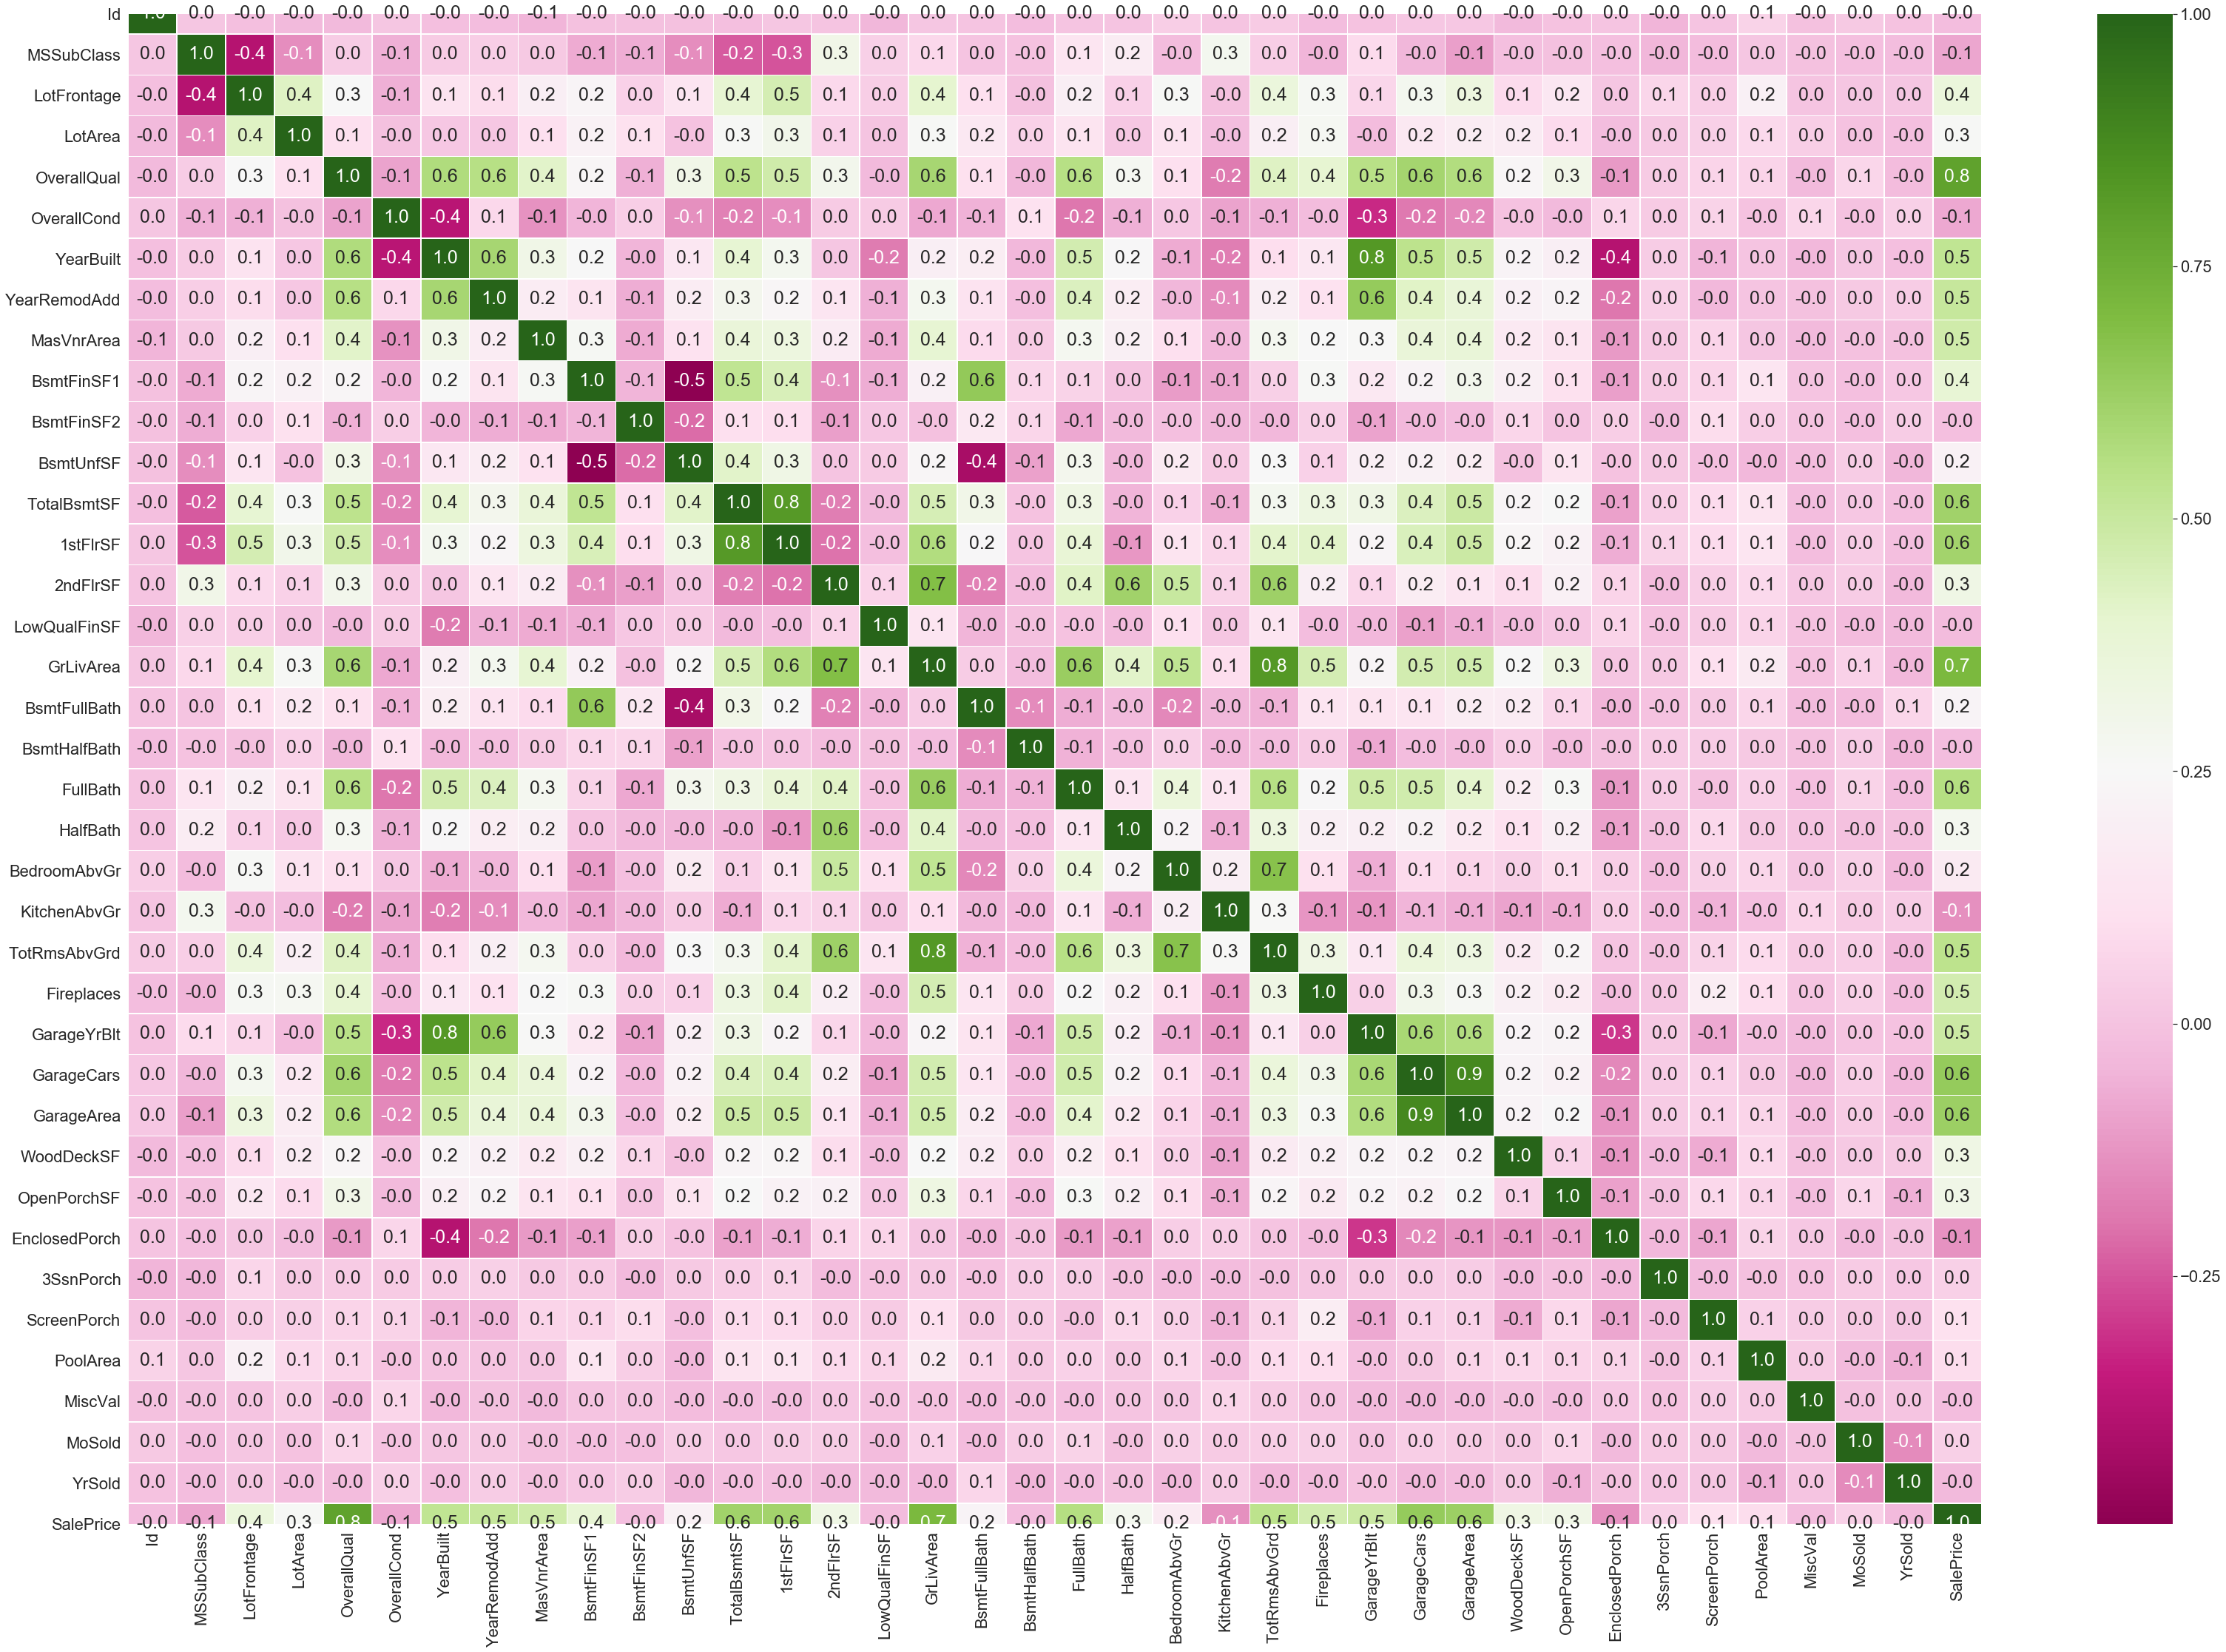

In [13]:
correlation_train=train.corr()
sns.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sns.heatmap(correlation_train, annot=True,annot_kws={"size": 25},fmt='.1f',cmap='PiYG', linewidths=.5)

In [14]:
corr_dict=correlation_train['SalePrice'].sort_values(ascending=False).to_dict()
important_columns=[]
for key,value in corr_dict.items():
    if ((value>0.1) & (value<0.8)) | (value<=-0.1):
        important_columns.append(key)
print(important_columns)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'EnclosedPorch', 'KitchenAbvGr']


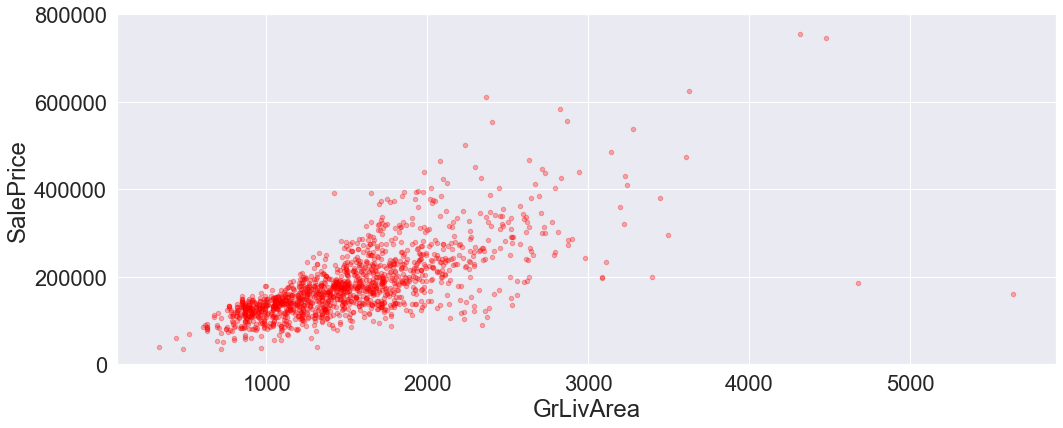

In [15]:
df = pd.concat([train['GrLivArea'],train["SalePrice"]],axis = 1)
df.plot.scatter(x = "GrLivArea",y = "SalePrice",alpha = 0.3,ylim = (0,800000),c = "red")

In [16]:
print(train[train.SalePrice>450000].shape)
#train[train.SalePrice>450000]

(14, 81)


# Cleaning the DataSet

In [17]:
train_test=pd.concat([train,test],axis=0,sort=False)
train_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [18]:
train_test_null_info = pd.DataFrame(train_test.isnull().sum(),columns=['Count of NaN'])
train_test_dtype_info = pd.DataFrame(train_test.dtypes,columns=['DataTypes'])
train_tes_info = pd.concat([train_test_null_info,train_test_dtype_info],axis=1)
train_tes_info['% of Nan'] = train_tes_info['Count of NaN']/train_test.shape[0] *100
train_tes_info

Count of NaN DataTypes   % of Nan
Id                        0     int64   0.000000
MSSubClass                0     int64   0.000000
MSZoning                  4    object   0.137033
LotFrontage             486   float64  16.649538
LotArea                   0     int64   0.000000
Street                    0    object   0.000000
Alley                  2721    object  93.216855
LotShape                  0    object   0.000000
LandContour               0    object   0.000000
Utilities                 2    object   0.068517
LotConfig                 0    object   0.000000
LandSlope                 0    object   0.000000
Neighborhood              0    object   0.000000
Condition1                0    object   0.000000
Condition2                0    object   0.000000
BldgType                  0    object   0.000000
HouseStyle                0    object   0.000000
OverallQual               0     int64   0.000000
OverallCond               0     int64   0.000000
YearBuilt                 0     int64   0.000000
YearRemodAdd              0     int64   0.000000
RoofStyle                 0    object   0.000000
RoofMatl                  0    object   0.000000
Exterior1st               1    object   0.034258
Exterior2nd               1    object   0.034258
MasVnrType               24    object   0.822199
MasVnrArea               23   float64   0.787941
ExterQual                 0    object   0.000000
ExterCond                 0    object   0.000000
Foundation                0    object   0.000000
BsmtQual                 81    object   2.774923
BsmtCond                 82    object   2.809181
BsmtExposure             82    object   2.809181
BsmtFinType1             79    object   2.706406
BsmtFinSF1                1   float64   0.034258
BsmtFinType2             80    object   2.740665
BsmtFinSF2                1   float64   0.034258
BsmtUnfSF                 1   float64   0.034258
TotalBsmtSF               1   float64   0.034258
Heating                   0    object   0.000000
HeatingQC                 0    object   0.000000
CentralAir                0    object   0.000000
Electrical                1    object   0.034258
1stFlrSF                  0     int64   0.000000
2ndFlrSF                  0     int64   0.000000
LowQualFinSF              0     int64   0.000000
GrLivArea                 0     int64   0.000000
BsmtFullBath              2   float64   0.068517
BsmtHalfBath              2   float64   0.068517
FullBath                  0     int64   0.000000
HalfBath                  0     int64   0.000000
BedroomAbvGr              0     int64   0.000000
KitchenAbvGr              0     int64   0.000000
KitchenQual               1    object   0.034258
TotRmsAbvGrd              0     int64   0.000000
Functional                2    object   0.068517
Fireplaces                0     int64   0.000000
FireplaceQu            1420    object  48.646797
GarageType              157    object   5.378554
GarageYrBlt             159   float64   5.447071
GarageFinish            159    object   5.447071
GarageCars                1   float64   0.034258
GarageArea                1   float64   0.034258
GarageQual              159    object   5.447071
GarageCond              159    object   5.447071
PavedDrive                0    object   0.000000
WoodDeckSF                0     int64   0.000000
OpenPorchSF               0     int64   0.000000
EnclosedPorch             0     int64   0.000000
3SsnPorch                 0     int64   0.000000
ScreenPorch               0     int64   0.000000
PoolArea                  0     int64   0.000000
PoolQC                 2909    object  99.657417
Fence                  2348    object  80.438506
MiscFeature            2814    object  96.402878
MiscVal                   0     int64   0.000000
MoSold                    0     int64   0.000000
YrSold                    0     int64   0.000000
SaleType                  1    object   0.034258
SaleCondition             0    object   0.000000
SalePrice              1459   float64  49.9828

In [19]:
train_test.loc[train_test['Fireplaces']==0,'FireplaceQu']= 'Nothing'

In [20]:
#train_test.groupby('1stFlrSF')['LotFrontage'].transform('mean')

In [21]:
train_test['LotFrontage'] = train_test['LotFrontage'].fillna(train_test.groupby('1stFlrSF')['LotFrontage'].transform('mean'))

In [22]:
train_test["LotFrontage"].isnull().sum()

84

In [23]:
train_test['LotFrontage'].interpolate(method='linear',inplace=True)
train_test['LotFrontage']=train_test['LotFrontage'].astype(int)

In [24]:
train_test['MasVnrArea'] = train_test['MasVnrArea'].fillna(train_test.groupby('MasVnrType')['MasVnrArea'].transform('mean'))
train_test['MasVnrArea'].interpolate(method='linear',inplace=True)
train_test['MasVnrArea']=train_test['MasVnrArea'].astype(int)

In [25]:
train_test["Fence"] = train_test["Fence"].fillna("None")
train_test["FireplaceQu"] = train_test["FireplaceQu"].fillna("None")
train_test["Alley"] = train_test["Alley"].fillna("None")
train_test["PoolQC"] = train_test["PoolQC"].fillna("None")
train_test["MiscFeature"] = train_test["MiscFeature"].fillna("None")

In [26]:
#train[['BsmtFinSF1','BsmtFinType1']]

In [27]:
#train_test[train_test['BsmtFinType1'].isnull()][['BsmtFinSF1','BsmtFinType1']]

In [28]:
train[train.BsmtFinSF1 == 0]["BsmtFinType1"].mode()

0    Unf
dtype: object

In [29]:
#train[train['BsmtQual'].isnull()][['BsmtQual','BsmtFinSF2']]

In [30]:
train[train['BsmtFinSF2'] == 0]['BsmtQual'].value_counts()

Gd    567
TA    538
Ex    117
Fa     34
Name: BsmtQual, dtype: int64

In [31]:
train_test.loc[train_test['BsmtFinSF1']==0,'BsmtFinType1']='Unf'
train_test.loc[train_test['BsmtFinSF2']==0,'BsmtQual']='Gd'

In [32]:
train[['YearBuilt','YearRemodAdd']].head()

YearBuilt  YearRemodAdd
0       2003          2003
1       1976          1976
2       2001          2002
3       1915          1970
4       2000          2000

In [33]:
train.loc[(train['YearBuilt'] > train['YearRemodAdd'])]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [34]:
#Making New Features

In [35]:
train_test['YrBltRmd']=train_test['YearRemodAdd'] - train_test['YearBuilt'] 

In [36]:
train_test[train_test['YrBltRmd'] < 0]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
416  1877          20       RL           65    10739   Pave  None      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
416         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
416       Norm     1Fam     1Story            7            5       2002   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
416          2001     Gable  CompShg     VinylSd     VinylSd    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
416          68        Gd        TA      PConc       Gd       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
416          GLQ      1259.0          Unf         0.0      172.0       1431.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
416    GasA        Ex          Y      SBrkr      1444         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
416       1444           1.0           0.0         2         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
416             1          Gd             6        Typ           0   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
416     Nothing     Attchd       2002.0          RFn         2.0       577.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
416         TA         TA          Y         144           40              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
416          0            0         0   None  None        None        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  YrBltRmd  
416       4    2009       WD        Normal        NaN        -1

In [37]:
train_test['YrBltRmd'].replace(-1,0,inplace = True)

In [38]:
train_test['Total_Square_Feet'] = (train_test['BsmtFinSF1'] + train_test['BsmtFinSF2'] + train_test['1stFlrSF'] + train_test['2ndFlrSF'] + train_test['TotalBsmtSF'])

In [39]:
train_test['Total_Bath'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) + train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

In [40]:
train_test['Total_Porch_Area'] = (train_test['OpenPorchSF'] + train_test['3SsnPorch'] + train_test['EnclosedPorch'] + train_test['ScreenPorch'] + train_test['WoodDeckSF'])

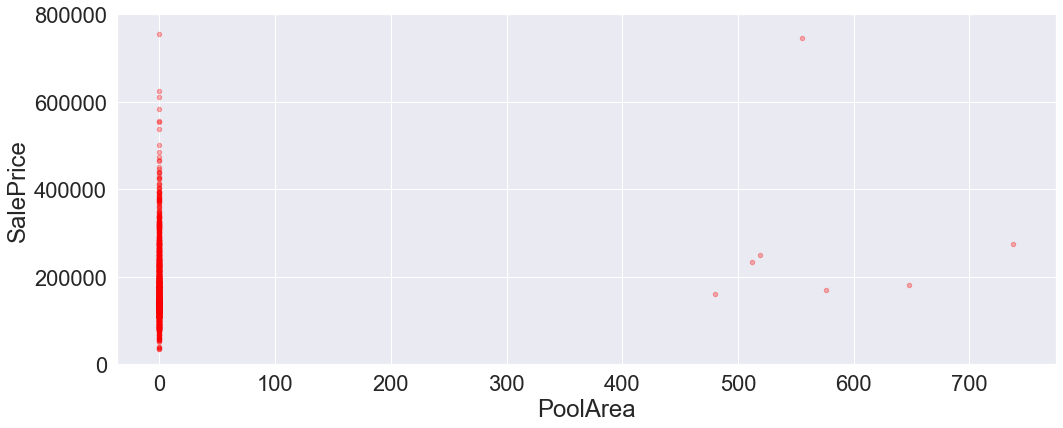

In [41]:
df = pd.concat([train['PoolArea'],train["SalePrice"]],axis = 1)
df.plot.scatter(x = 'PoolArea',y = "SalePrice",alpha = 0.3,ylim = (0,800000),c = "red")

In [42]:
train_test['exists_pool'] = train_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

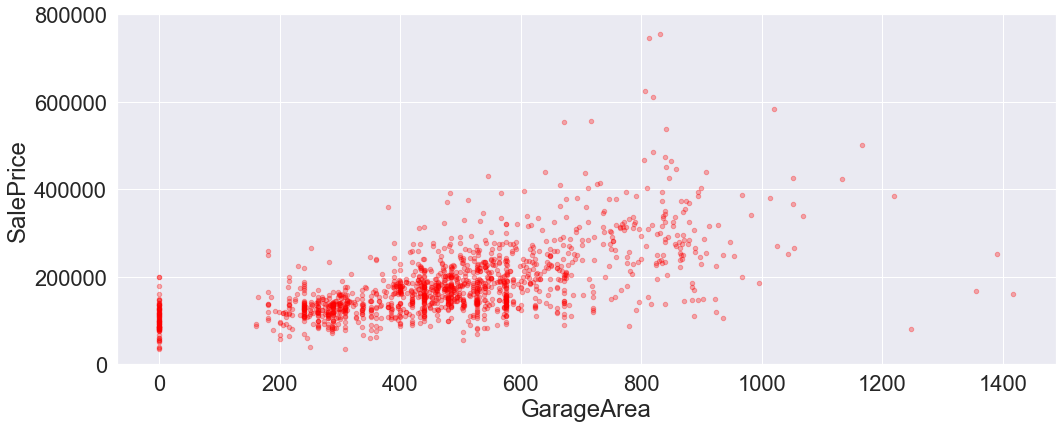

In [43]:
df = pd.concat([train['GarageArea'],train["SalePrice"]],axis = 1)
df.plot.scatter(x = 'GarageArea',y = "SalePrice",alpha = 0.3,ylim = (0,800000),c = "red")

In [44]:
train_test['exists_garage'] = train_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

In [45]:
train_test['exists_fireplace'] = train_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [46]:
train_test['exists_bsmt'] = train_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

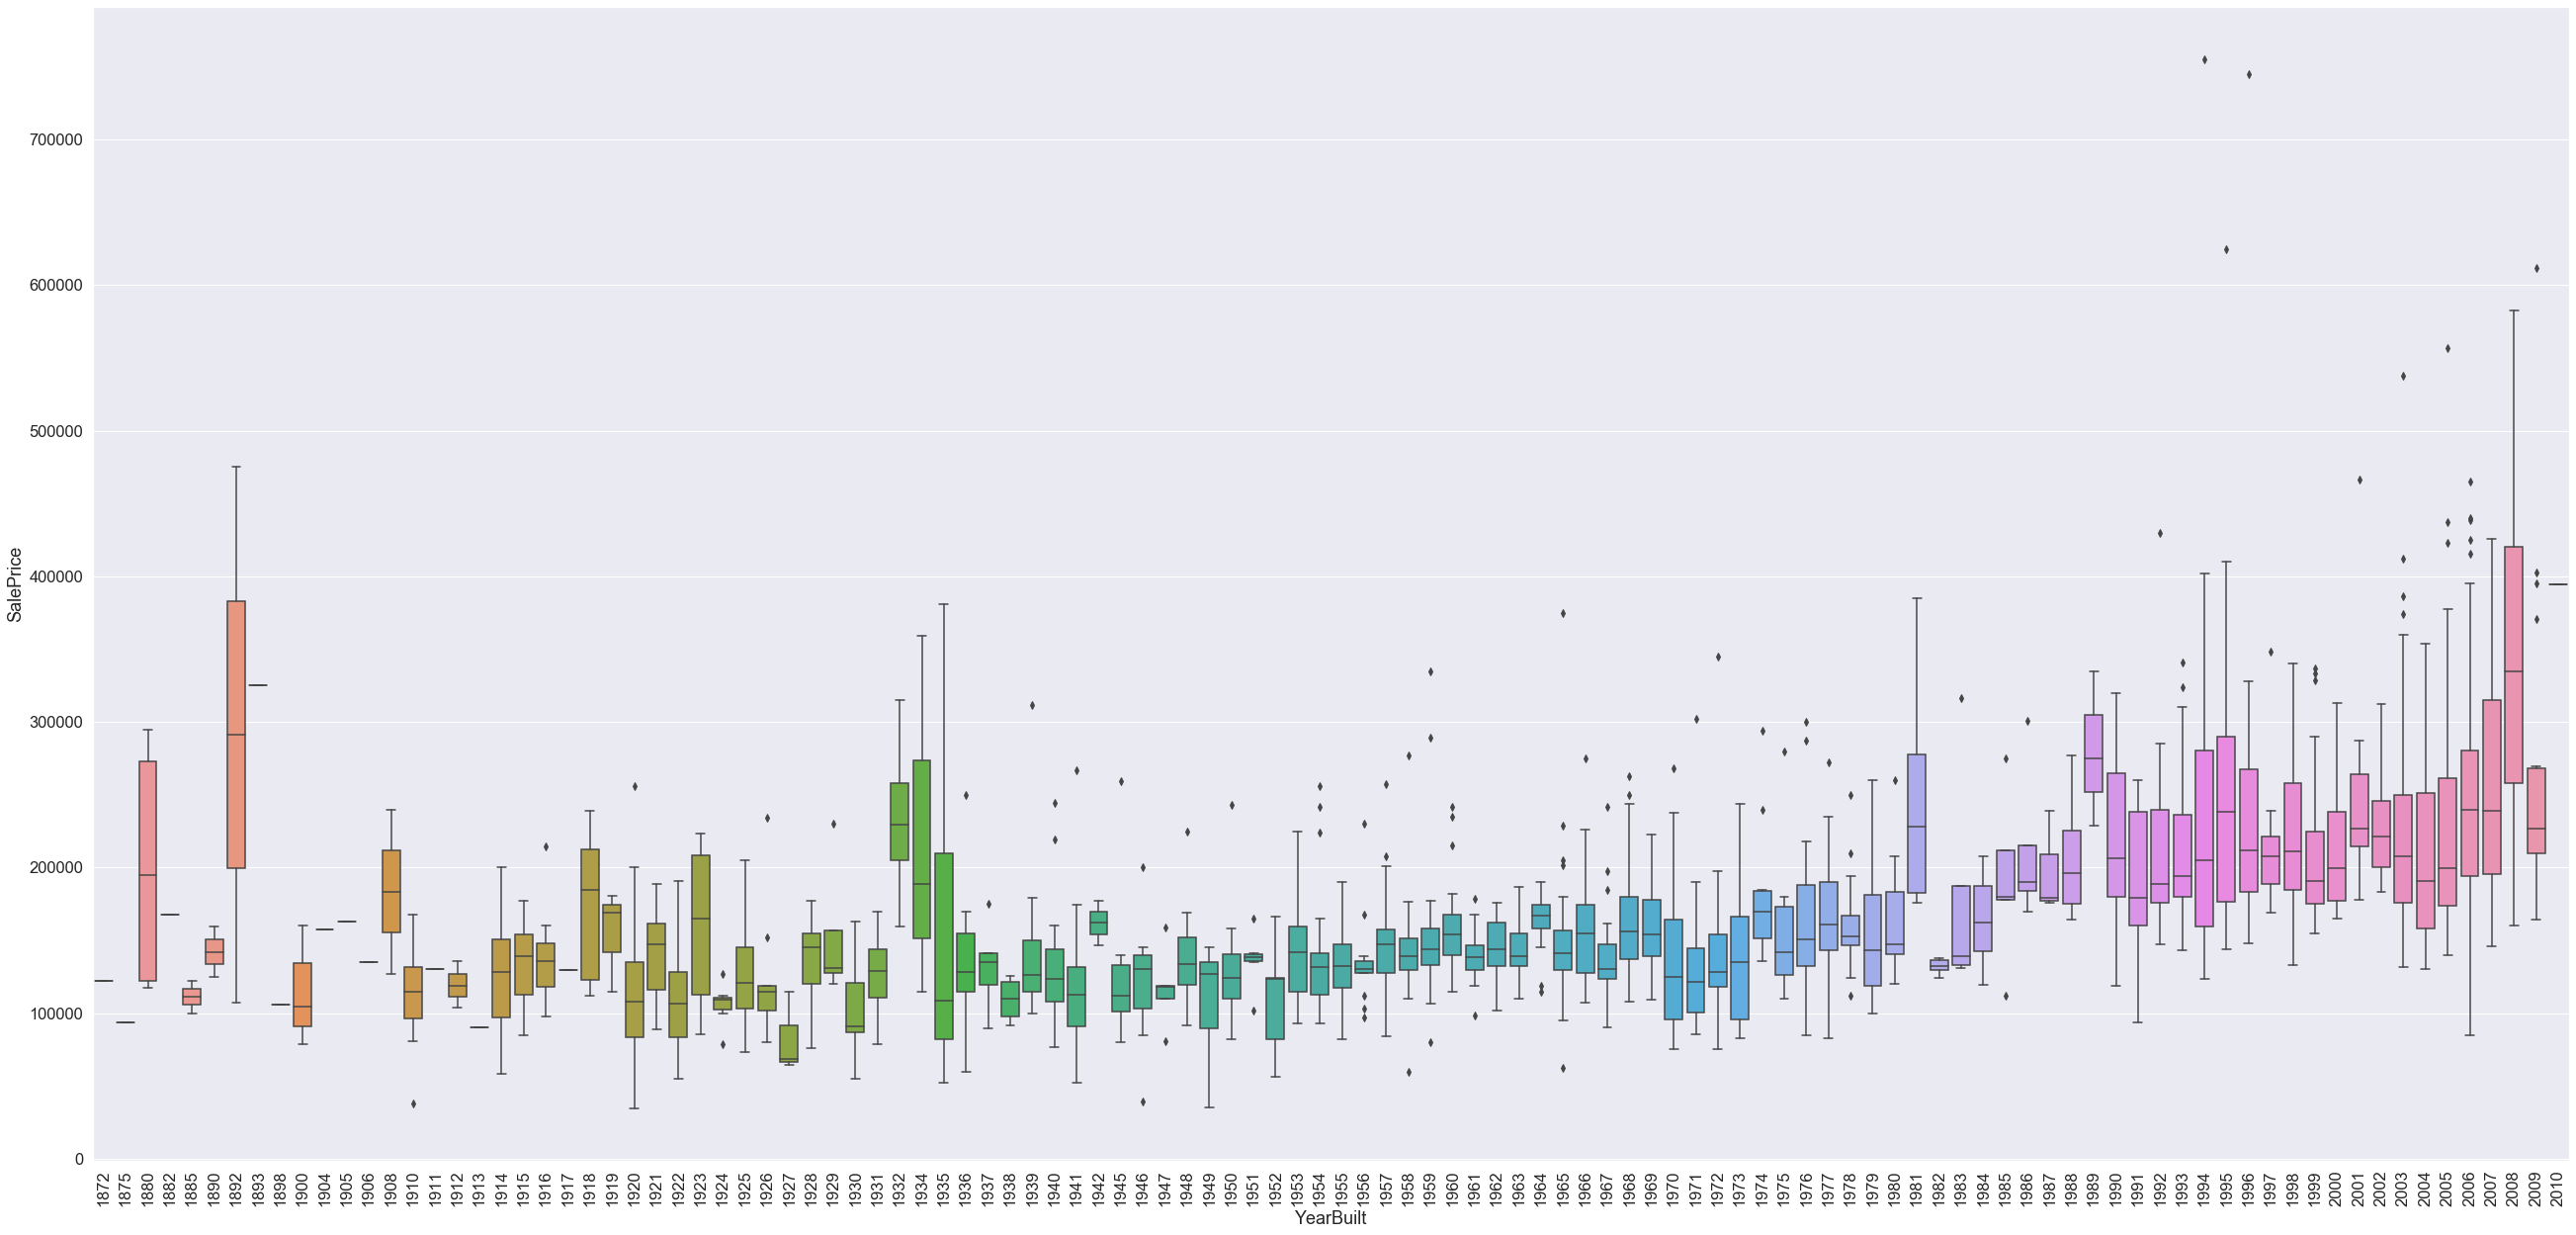

In [47]:
plt.figure(figsize=(40,20))
sns.set(font_scale=1.5)
sns.boxplot(x = "YearBuilt",y = "SalePrice",data = train)
plt.xticks(rotation = 90)
plt.show()

In [48]:
train_test['old_house'] = train_test['YearBuilt'].apply(lambda x: 1 if x <1990 else 0)

In [49]:
#train_test.isnull().sum()

In [50]:
for i in train_test.columns:
    if 'SalePrice' not in i:
        if 'object' in str(train_test[str(i)].dtype):
            train_test[str(i)]=train_test[str(i)].fillna(method='ffill')

In [51]:
columns = []
for c in train_test.columns:
    if(train_test[c].dtype == "O"):
        columns.append(c)

In [52]:
print(columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [53]:
df = train_test[list(columns)]
for x in columns:
    lb_1 = LabelEncoder()
    df[str(x)] = lb_1.fit_transform(df[str(x)])
df.head()

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0         3       1      1         3            3          0          4   
1         3       1      1         3            3          0          2   
2         3       1      1         0            3          0          4   
3         3       1      1         0            3          0          0   
4         3       1      1         0            3          0          2   

   LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
0          0             5           2           2         0           5   
1          0            24           1           2         0           2   
2          0             5           2           2         0           5   
3          0             6           2           2         0           5   
4          0            15           2           2         0           5   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  \
0          1         1           12           13           1          2   
1          1         1            8            8           2          3   
2          1         1           12           13           1          2   
3          1         1           13           15           2          3   
4          1         1           12           13           1          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          4           2         2         3             3             2   
1          4           1         2         3             1             0   
2          4           2         2         3             2             2   
3          4           0         2         1             3             0   
4          4           2         2         3             0             2   

   BsmtFinType2  Heating  HeatingQC  CentralAir  Electrical  KitchenQual  \
0             5        1          0           1           4            2   
1             5        1          0           1           4            3   
2             5        1          0           1           4            2   
3             5        1          2           1           4            2   
4             5        1          0           1           4            2   

   Functional  FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  \
0           6            3           1             1           4           4   
1           6            5           1             1           4           4   
2           6            5           1             1           4           4   
3           6            2           5             2           4           4   
4           6            5           1             1           4           4   

   PavedDrive  PoolQC  Fence  MiscFeature  SaleType  SaleCondition  
0           2       3      4            1         8              4  
1           2       3      4            1         8              4  
2           2       3      4            1         8              4  
3           2       3      4            1         8              0  
4           2       3      4            1         8              4

In [54]:
for x in df.columns:
    vir = pd.concat([df[str(x)],train_test["SalePrice"]],axis = 1)
    vir = vir.corr("kendall")
    vir = np.array(vir)
    print(x,"  ",vir[0][1])

MSZoning    -0.26941594307012406
Street    0.03746633543069483
Alley    0.10960863678422127
LotShape    -0.2457270358042805
LandContour    -0.008691601344895375
Utilities    -0.013664933823465338
LotConfig    -0.05894368002349876
LandSlope    0.040937442552146194
Neighborhood    0.11762528668211168
Condition1    0.14866375325152928
Condition2    0.05038357297698097
BldgType    -0.09420445415677511
HouseStyle    0.18946631269971595
RoofStyle    0.11286870838853237
RoofMatl    0.06848520213948898
Exterior1st    0.054382190468786486
Exterior2nd    0.05504607033691881
MasVnrType    -0.06656397254676705
ExterQual    -0.5214725684583823
ExterCond    0.10440215289957756
Foundation    0.39637300903208966
BsmtQual    -0.0842360419188926
BsmtCond    0.03822921177530163
BsmtExposure    -0.2102475230307935
BsmtFinType1    -0.06434605518900284
BsmtFinType2    0.041158330691132915
Heating    -0.08652408932443573
HeatingQC    -0.3649714918307321
CentralAir    0.25620196571105797
Electrical    0.23906

In [55]:
train_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL           65     8450   Pave  None      Reg   
1   2          20       RL           80     9600   Pave  None      Reg   
2   3          60       RL           68    11250   Pave  None      IR1   
3   4          70       RL           60     9550   Pave  None      IR1   
4   5          60       RL           84    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         196        Gd        TA      PConc       Gd       TA           No   
1           0        TA        TA     CBlock       Gd       TA           Gd   
2         162        Gd        TA      PConc       Gd       TA           Mn   
3           0        TA        TA     BrkTil       Gd       Gd           No   
4         350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Nothing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [56]:
columns = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond','HeatingQC', 'PoolQC',
           'KitchenQual', 'BsmtFinType1', 'YrSold', 'MoSold', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 
           'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond']
train_test[columns].head()

FireplaceQu BsmtQual BsmtCond GarageQual GarageCond ExterQual ExterCond  \
0     Nothing       Gd       TA         TA         TA        Gd        TA   
1          TA       Gd       TA         TA         TA        TA        TA   
2          TA       Gd       TA         TA         TA        Gd        TA   
3          Gd       Gd       Gd         TA         TA        TA        TA   
4          TA       Gd       TA         TA         TA        Gd        TA   

  HeatingQC PoolQC KitchenQual BsmtFinType1  YrSold  MoSold BsmtFinType2  \
0        Ex   None          Gd          GLQ    2008       2          Unf   
1        Ex   None          TA          ALQ    2007       5          Unf   
2        Ex   None          Gd          GLQ    2008       9          Unf   
3        Gd   None          Gd          ALQ    2006       2          Unf   
4        Ex   None          Gd          GLQ    2008      12          Unf   

  Functional Fence BsmtExposure GarageFinish LandSlope LotShape PavedDrive  \
0        Typ  None           No          RFn       Gtl      Reg          Y   
1        Typ  None           Gd          RFn       Gtl      Reg          Y   
2        Typ  None           Mn          RFn       Gtl      IR1          Y   
3        Typ  None           No          Unf       Gtl      IR1          Y   
4        Typ  None           Av          RFn       Gtl      IR1          Y   

  Street Alley CentralAir  MSSubClass  OverallCond  
0   Pave  None          Y          60            5  
1   Pave  None          Y          20            8  
2   Pave  None          Y          60            5  
3   Pave  None          Y          70            5  
4   Pave  None          Y          60            5

In [57]:
for col in columns:
    lbl_enc = LabelEncoder() 
    lbl_enc.fit(list(train_test[col].values)) 
    train_test[col] = lbl_enc.transform(list(train_test[col].values))

In [58]:
train_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1           5       RL           65     8450       1      1         3   
1   2           0       RL           80     9600       1      1         3   
2   3           5       RL           68    11250       1      1         0   
3   4           6       RL           60     9550       1      1         0   
4   5           5       RL           84    14260       1      1         0   

  LandContour Utilities LotConfig  LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside          0      CollgCr       Norm   
1         Lvl    AllPub       FR2          0      Veenker      Feedr   
2         Lvl    AllPub    Inside          0      CollgCr       Norm   
3         Lvl    AllPub    Corner          0      Crawfor       Norm   
4         Lvl    AllPub       FR2          0      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            4       2003   
1       Norm     1Fam     1Story            6            7       1976   
2       Norm     1Fam     2Story            7            4       2001   
3       Norm     1Fam     2Story            7            4       1915   
4       Norm     1Fam     2Story            8            4       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0         196          2          4      PConc         2         3   
1           0          3          4     CBlock         2         3   
2         162          2          4      PConc         2         3   
3           0          3          4     BrkTil         2         1   
4         350          2          4      PConc         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2       706.0             5         0.0   
1             1             0       978.0             5         0.0   
2             2             2       486.0             5         0.0   
3             3             0       216.0             5         0.0   
4             0             2       655.0             5         0.0   

   BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  CentralAir Electrical  1stFlrSF  \
0      150.0        856.0    GasA          0           1      SBrkr       856   
1      284.0       1262.0    GasA          0           1      SBrkr      1262   
2      434.0        920.0    GasA          0           1      SBrkr       920   
3      540.0        756.0    GasA          2           1      SBrkr       961   
4      490.0       1145.0    GasA          0           1      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710           1.0           0.0         2   
1         0             0       1262           0.0           1.0         2   
2       866             0       1786           1.0           0.0         2   
3       756             0       1717           1.0           0.0         1   
4      1053             0       2198           1.0           0.0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1             3             1            2             8   
1         0             3             1            3             6   
2         1             3             1            2             6   
3         0             3             1            2             7   
4         1             4             1            2             9   

   F

In [59]:
train_test.dtypes[train_test.dtypes != "object"].index

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice', 'YrBltRmd', 'Total_Square_Feet', 'Total_Bath',
       'Total_Porch_Area', 'exists_pool', 'exists_gar

In [60]:
numeric_features = train_test.dtypes[train_test.dtypes != "object"].index
skewed_features = train_test[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
print(skewed_features[:15])

MiscVal          21.947195
PoolArea         16.898328
exists_pool      14.884318
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
LandSlope         4.975157
KitchenAbvGr      4.302254
EnclosedPorch     4.003891
ScreenPorch       3.946694
MasVnrArea        2.600375
OpenPorchSF       2.535114
YrBltRmd          2.063732
WoodDeckSF        1.842433
BsmtQual          1.641988
dtype: float64


In [61]:
high_skewness = skewed_features[abs(skewed_features) > 0.9]
skewed_features = high_skewness.index

In [62]:
#print(high_skewness)
print('\nVariables with high skewness: \n\n',skewed_features)


Variables with high skewness: 

 Index(['MiscVal', 'PoolArea', 'exists_pool', 'LotArea', 'LowQualFinSF',
       '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'EnclosedPorch',
       'ScreenPorch', 'MasVnrArea', 'OpenPorchSF', 'YrBltRmd', 'WoodDeckSF',
       'BsmtQual', 'LotFrontage', '1stFlrSF', 'Total_Porch_Area', 'GrLivArea',
       'BsmtExposure', 'KitchenQual', 'ExterQual', 'Fence', 'ExterCond',
       'PavedDrive', 'BsmtCond', 'BsmtFinType2', 'CentralAir', 'GarageQual',
       'exists_garage', 'Functional', 'GarageCond', 'exists_bsmt', 'Street',
       'PoolQC'],
      dtype='object')


In [63]:
train_test[['MiscVal', 'PoolArea', 'exists_pool', 'LotArea', 'LowQualFinSF', '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'EnclosedPorch',
       'ScreenPorch', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', '1stFlrSF', 'Total_Porch_Area', 'GrLivArea', 'BsmtExposure',
       'KitchenQual', 'ExterQual', 'Fence', 'ExterCond', 'PavedDrive', 'BsmtCond', 'BsmtFinType2', 'CentralAir', 'GarageQual', 'exists_garage',
       'Functional', 'GarageCond', 'exists_bsmt', 'BsmtQual', 'Street','PoolQC']].head()

MiscVal  PoolArea  exists_pool  LotArea  LowQualFinSF  3SsnPorch  \
0        0         0            0     8450             0          0   
1        0         0            0     9600             0          0   
2        0         0            0    11250             0          0   
3        0         0            0     9550             0          0   
4        0         0            0    14260             0          0   

   LandSlope  KitchenAbvGr  EnclosedPorch  ScreenPorch  MasVnrArea  \
0          0             1              0            0         196   
1          0             1              0            0           0   
2          0             1              0            0         162   
3          0             1            272            0           0   
4          0             1              0            0         350   

   OpenPorchSF  WoodDeckSF  LotFrontage  1stFlrSF  Total_Porch_Area  \
0           61           0           65       856                61   
1            0         298           80      1262               298   
2           42           0           68       920                42   
3           35           0           60       961               307   
4           84         192           84      1145               276   

   GrLivArea  BsmtExposure  KitchenQual  ExterQual  Fence  ExterCond  \
0       1710             3            2          2      4          4   
1       1262             1            3          3      4          4   
2       1786             2            2          2      4          4   
3       1717             3            2          3      4          4   
4       2198             0            2          2      4          4   

   PavedDrive  BsmtCond  BsmtFinType2  CentralAir  GarageQual  exists_garage  \
0           2         3             5           1           4              1   
1           2         3             5           1           4              1   
2           2         3             5           1           4              1   
3           2         1             5           1           4              1   
4           2         3             5           1           4              1   

   Functional  GarageCond  exists_bsmt  BsmtQual  Street  PoolQC  
0           6           4            1         2       1       3  
1           6           4            1         2       1       3  
2           6           4            1         2       1       3  
3           6           4            1         2       1       3  
4           6           4            1         2       1       3

In [64]:
vir = train_test["LotArea"]
boxcox_normmax(vir + 1) #to maximize the excepted value y = boxcox(var)

0.08232952585179609

In [65]:
#Transforming the data
for feature in skewed_features:
    train_test[feature] = boxcox1p(train_test[feature], boxcox_normmax(train_test[feature] + 1))

In [66]:
vir =pd.get_dummies(train_test,dtype='int8')
vir.head()

Id  MSSubClass  LotFrontage    LotArea    Street  Alley  LotShape  \
0   1           5    13.668864  13.424522  5.271674      1         3   
1   2           0    15.311586  13.694528  5.271674      1         3   
2   3           5    14.011693  14.034135  5.271674      1         0   
3   4           6    13.079139  13.683422  5.271674      1         0   
4   5           5    15.722536  14.550144  5.271674      1         0   

   LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0        0.0            7            4       2003          2003   19.509968   
1        0.0            6            7       1976          1976    0.000000   
2        0.0            7            4       2001          2002   17.835998   
3        0.0            7            4       1915          1970    0.000000   
4        0.0            8            4       2000          2000   25.518159   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0   5.498766   5.100238  2.781865  5.218987      6.112247             2   
1  11.456359   5.100238  2.781865  5.218987      1.372290             0   
2   5.498766   5.100238  2.781865  5.218987      3.429154             2   
3  11.456359   5.100238  2.781865  1.280547      6.112247             0   
4   5.498766   5.100238  2.781865  5.218987      0.000000             2   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0       706.0   1444.251693         0.0      150.0        856.0          0   
1       978.0   1444.251693         0.0      284.0       1262.0          0   
2       486.0   1444.251693         0.0      434.0        920.0          0   
3       216.0   1444.251693         0.0      540.0        756.0          2   
4       655.0   1444.251693         0.0      490.0       1145.0          0   

   CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0   46.910889  5.318378       854           0.0   7.234117           1.0   
1   46.910889  5.550625         0           0.0   6.947213           0.0   
2   46.910889  5.362014       866           0.0   7.275134           1.0   
3   46.910889  5.388290       756           0.0   7.237971           1.0   
4   46.910889  5.493030      1053           0.0   7.470743           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0         2         1             3       0.75096     5.077704   
1           1.0         2         0             3       0.75096    10.302990   
2           0.0         2         1             3       0.75096     5.077704   
3           0.0         1         0             3       0.75096     5.077704   
4           0.0         2         1             4       0.75096     5.077704   

   TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageYrBlt  \
0             8      30.831           0            3       2003.0   
1             6      30.831           1            5       1976.0   
2             6      30.831           1            5       2001.0   
3             7      30.831           1            2       1998.0   
4             9      30.831           1            5       2000.0   

   GarageFinish  GarageCars  GarageArea  GarageQual   GarageCond  PavedDrive  \
0             1         2.0       548.0   23.441187  2952.403348   10.465796   
1             1         2.0       460.0   23.441187  2952.403348   10.465796   
2             1         2.0       608.0   23.441187  2952.403348   10.465796   
3             2         3.0       642.0   23.441187  2952.403348   10.465796   
4             1         3.0       836.0   23.441187  2952.403348   10.465796   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0    0.000000    12.009559       0.000000        0.0          0.0       0.0   
1   56.339196     0.000000       0.000000        0.0          0.0       0.0   
2    0.000000     9.849185       0.000000        0.0          0.0       0.0   
3    0.000000     8.92174

In [67]:
vir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 232 entries, Id to SaleCondition_Partial
dtypes: float64(47), int64(22), int8(163)
memory usage: 2.0 MB


In [68]:
vir.shape

(2919, 232)

In [69]:
train_test=pd.get_dummies(train_test,dtype='int8')

In [70]:
train_test_null_info=pd.DataFrame(train_test.isnull().sum(),columns=['Count of NaN'])
train_test_dtype_info=pd.DataFrame(train_test.dtypes,columns=['DataTypes'])
train_test_info=pd.concat([train_test_null_info,train_test_dtype_info],axis=1)
train_test_info[train_test_info['Count of NaN'] != 0]

Count of NaN DataTypes
BsmtFinSF1                    1   float64
BsmtFinSF2                    1   float64
BsmtUnfSF                     1   float64
TotalBsmtSF                   1   float64
BsmtFullBath                  2   float64
BsmtHalfBath                  2   float64
GarageYrBlt                 159   float64
GarageCars                    1   float64
GarageArea                    1   float64
SalePrice                  1459   float64
Total_Square_Feet             1   float64
Total_Bath                    2   float64

In [71]:
print(train.shape)
print(test.shape)
print(train_test.shape)

(1460, 81)
(1459, 80)
(2919, 232)


In [72]:
Train = train.copy()
Test =  test.copy() #just to see the original data :)LOL
train = train_test[0:1460]
test = train_test[1460:2919]

In [73]:
print(train.shape)
print(test.shape)
print(train_test.shape)

(1460, 232)
(1459, 232)
(2919, 232)


In [74]:
train.interpolate(method='linear',inplace=True)
test.interpolate(method='linear',inplace=True)

In [75]:
for x in train.columns:
    if(train[x].isnull().sum() > 0):
        print(x)

In [76]:
for x in test.columns:
    if(train[x].isnull().sum() > 0):
        print(x)

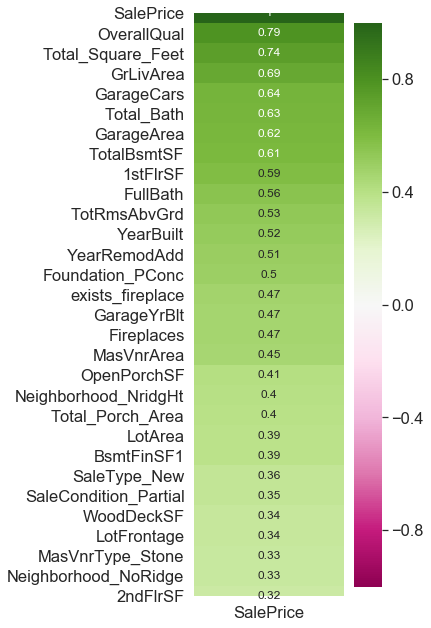

In [77]:
corr_new_train=train.corr()
plt.figure(figsize=(3,10))
sns.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30),annot_kws={"size": 12},vmin=-1, cmap='PiYG', annot=True)
sns.set(font_scale=2)

# Let's Visualize the columns with the best correlation with the SalePrice

In [78]:
corr_dict2=corr_new_train['SalePrice'].sort_values(ascending=False).to_dict()
#corr_dict2

In [79]:
best_columns=[]
for key,value in corr_dict2.items():
    if ((value>=0.30) & (value<0.9)) | (value<=-0.30):
        best_columns.append(key)
print(best_columns)

['OverallQual', 'Total_Square_Feet', 'GrLivArea', 'GarageCars', 'Total_Bath', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Foundation_PConc', 'exists_fireplace', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'OpenPorchSF', 'Neighborhood_NridgHt', 'Total_Porch_Area', 'LotArea', 'BsmtFinSF1', 'SaleType_New', 'SaleCondition_Partial', 'WoodDeckSF', 'LotFrontage', 'MasVnrType_Stone', 'Neighborhood_NoRidge', '2ndFlrSF', 'Exterior2nd_VinylSd', 'Exterior1st_VinylSd', 'Foundation_CBlock', 'MasVnrType_None', 'GarageType_Detchd', 'HeatingQC', 'GarageFinish', 'old_house', 'KitchenQual', 'ExterQual']


In [80]:
len(best_columns)

39

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39]), <a list of 39 Text xticklabel objects>)

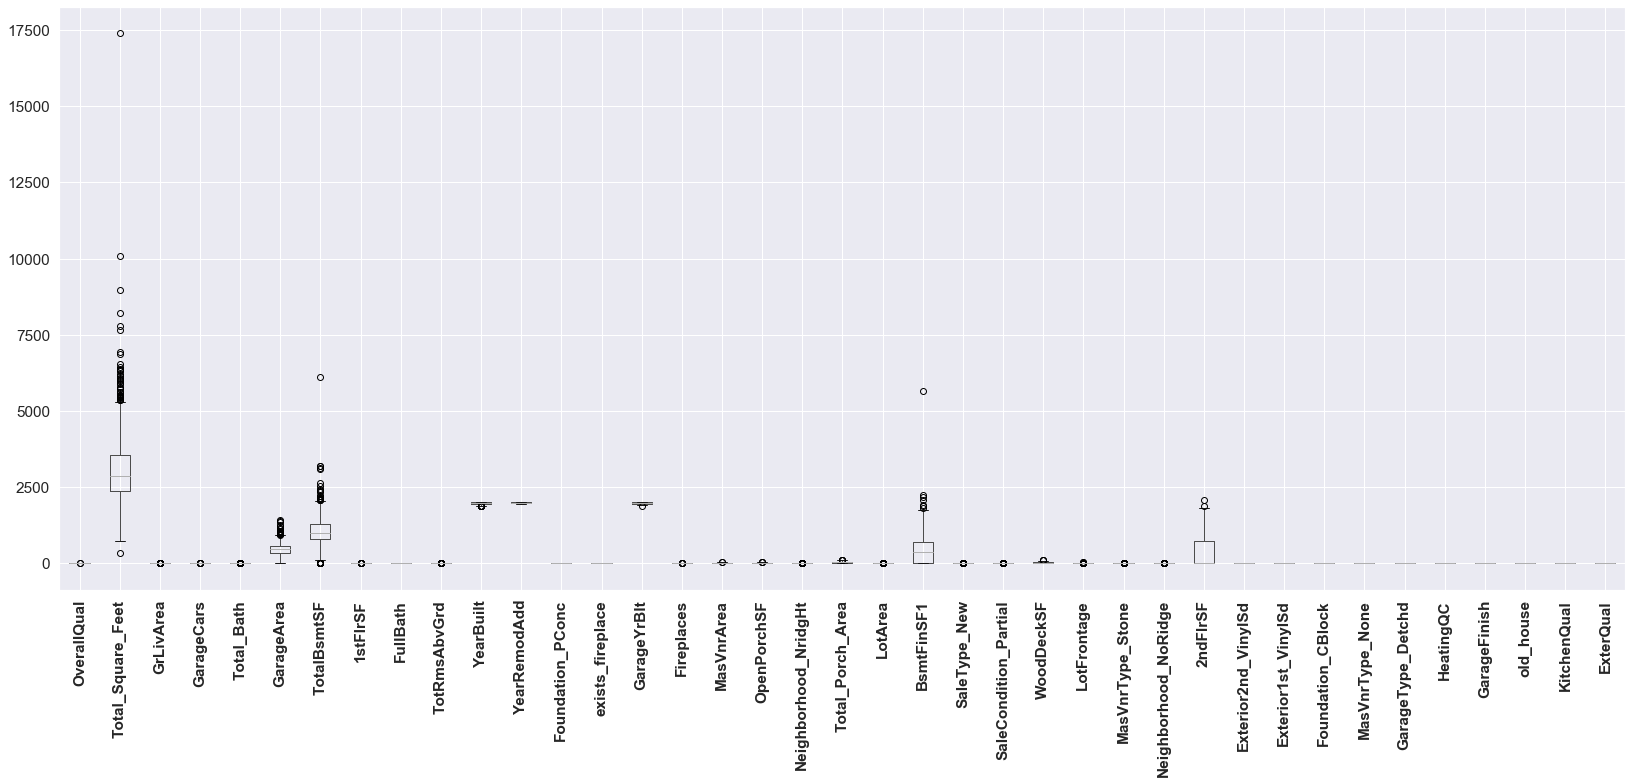

In [81]:
plt.figure(figsize=(25,10))
sns.set(font_scale=1.4)
train.boxplot(column=best_columns)
plt.xticks(weight='bold',rotation=90)

In [82]:
SLePrice = train["SalePrice"]
train['SalePrice_Log1p'] = np.log1p(train.SalePrice)

In [83]:
SLePrice = train["SalePrice"]
train['SalePrice_Log1p'] = np.log1p(train.SalePrice)

In [84]:
print(min(train['SalePrice']),end = "   ")
print(min(train['SalePrice_Log1p']))
print(max(train['SalePrice']),end = "   ")
print(max(train['SalePrice_Log1p']))

34900.0   10.460270761075149
755000.0   13.534474352733596


Skew Dist: 1.8828757597682129
Kurtosis Dist: 6.536281860064529


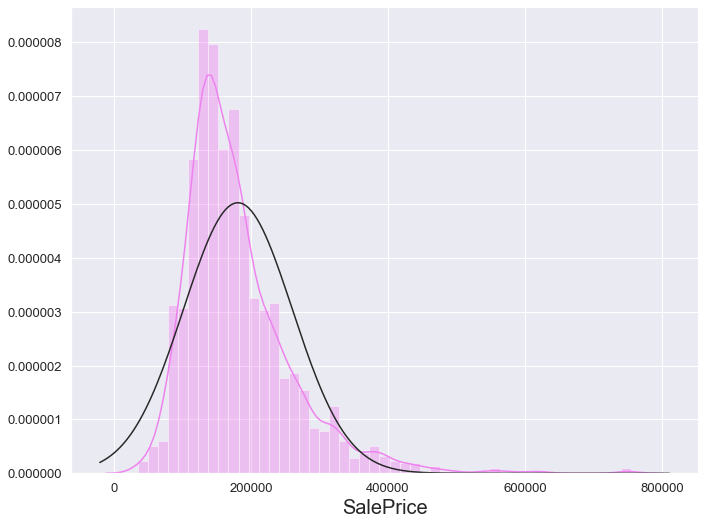

In [85]:
from scipy.stats import norm
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.distplot(train['SalePrice'],color='violet',fit = norm)
plt.xlabel('SalePrice',fontsize=20)
print('Skew Dist:',train['SalePrice'].skew())
print('Kurtosis Dist:',train['SalePrice'].kurt())

Skew Dist: 0.12134661989685333
Kurtosis Dist: 0.809519155707878


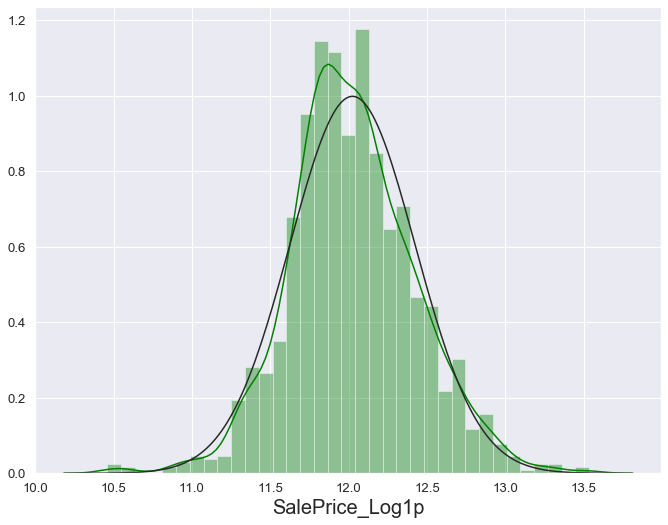

In [86]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.distplot(train['SalePrice_Log1p'],color='green',fit = norm)
plt.xlabel('SalePrice_Log1p',fontsize=20)
print('Skew Dist:',train['SalePrice_Log1p'].skew())
print('Kurtosis Dist:',train['SalePrice_Log1p'].kurt())

# Outliers

In [87]:
rbst_scaler=RobustScaler()
train_rbst=rbst_scaler.fit_transform(train)
pd.DataFrame(train_rbst).head()

0         1         2         3    4    5    6    7    8    9    \
0 -1.000000  0.166667 -0.229015 -0.266658  0.0  0.0  0.0  0.0  0.5  0.0   
1 -0.998629 -0.666667  0.506825  0.029726  0.0  0.0  0.0  0.0  0.0  3.0   
2 -0.997258  0.166667 -0.075448  0.402509  0.0  0.0 -1.0  0.0  0.5  0.0   
3 -0.995888  0.333333 -0.493175  0.017535  0.0  0.0 -1.0  0.0  0.5  0.0   
4 -0.994517  0.166667  0.690905  0.968926  0.0  0.0 -1.0  0.0  1.0  0.0   

        10        11        12   13   14   15       16        17   18   \
0  0.652174  0.243243  1.081313 -1.0  0.0  0.0  0.00000  0.000000  0.0   
1  0.065217 -0.486486  0.000000  0.0  0.0  0.0  0.00000 -1.766602 -0.5   
2  0.608696  0.216216  0.988535 -1.0  0.0  0.0  0.00000 -1.000000  0.0   
3 -1.260870 -0.648649  0.000000  0.0  0.0  0.0 -3.93844  0.000000 -0.5   
4  0.586957  0.162162  1.414308 -1.0  0.0  0.0  0.00000 -2.278060  0.0   

        19   20   21        22        23   24   25        26        27   28   \
0  0.452790  0.0  0.0 -0.559829 -0.269652  0.0  0.0 -0.529475  1.173077  0.0   
1  0.834679  0.0  0.0 -0.330769  0.538308  0.0  0.0  0.326191  0.000000  0.0   
2  0.143910  0.0  0.0 -0.074359 -0.142289  0.0  0.0 -0.368707  1.189560  0.0   
3 -0.235170  0.0  0.0  0.106838 -0.468657  0.5  0.0 -0.271898  1.038462  0.0   
4  0.381186  0.0  0.0  0.021368  0.305473  0.0  0.0  0.113994  1.446429  0.0   

        29   30   31   32   33   34   35   36   37   38   39   40        41   \
0  0.342597  1.0  0.0  0.0  1.0  0.0  0.0 -1.0  1.0  0.0 -1.0  0.0  0.615385   
1 -0.327848  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0 -0.076923   
2  0.438446  1.0  0.0  0.0  1.0  0.0  0.0 -1.0  0.0  0.0  0.0  2.0  0.564103   
3  0.351603  1.0  0.0 -1.0  0.0  0.0  0.0 -1.0  0.5  0.0  0.0 -1.0  0.487179   
4  0.895551  1.0  0.0  0.0  1.0  1.0  0.0 -1.0  1.5  0.0  0.0  2.0  0.538462   

   42   43        44   45   46   47        48        49         50   51   52   \
0  0.0  0.0  0.281573  0.0  0.0  0.0  0.000000  0.362325   0.000000  0.0  0.0   
1  0.0  0.0 -0.082816  0.0  0.0  0.0  1.451378 -0.582472   0.000000  0.0  0.0   
2  0.0  0.0  0.530021  0.0  0.0  0.0  0.000000  0.192368   0.000000  0.0  0.0   
3  0.5  1.0  0.670807  0.0  0.0  0.0  0.000000  0.119406  16.012023  0.0  0.0   
4  0.0  1.0  1.474120  0.0  0.0  0.0  1.091030  0.533094   0.000000  0.0  0.0   

   53   54   55   56        57   58        59        60        61   62   \
0  0.0  0.0  0.0  0.0 -1.333333  0.0  0.541506  0.000000  0.326110  3.0   
1  0.0  0.0  0.0  0.0 -0.333333 -0.5  0.220173  0.000000  0.519672  1.0   
2  0.0  0.0  0.0  0.0  1.000000  0.0  0.720024  0.391845  0.258784  3.0   
3  0.0  0.0  0.0  0.0 -1.333333 -1.0 -0.273728  1.094860 -0.164528  0.0   
4  0.0  0.0  0.0  0.0  2.000000  0.0  1.035406  0.000000  0.937092  3.0   

        63   64   65   66   67   68   69   70   71   72   73   74   75   76   \
0 -0.509403  0.0  0.0 -1.0  0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.495541  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2 -0.634113  0.0  0.0  0.0  0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.525287  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.421320  0.0  0.0  0.0  0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   77   78   79   80   81   82   83   84   85   86   87   88   89   90   91   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   92   93   94   95   96   97   98   99   100  101  102  103  104  105  106  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.

Text(0, 0.5, 'Explanined variance ratio for number of components')

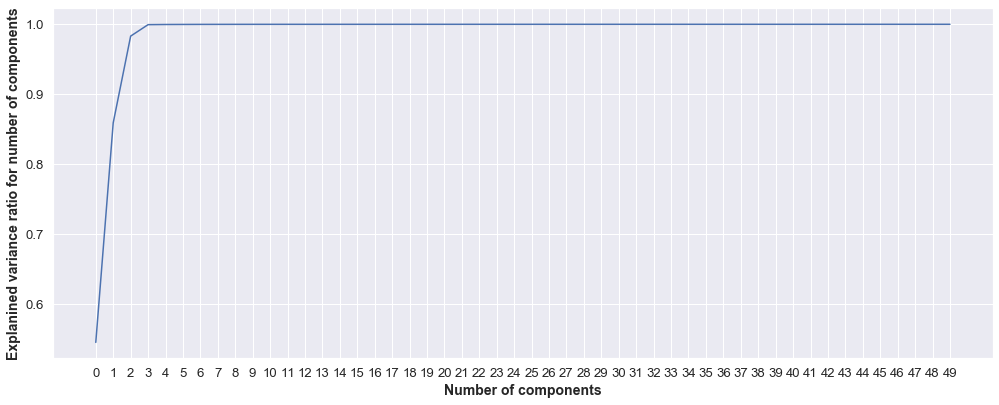

In [88]:
pca=PCA(50).fit(train_rbst)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xticks(np.arange(0, 50, 1))
plt.xlabel('Number of components',fontweight='bold',size=14)
plt.ylabel('Explanined variance ratio for number of components',fontweight='bold',size=14)

In [89]:
for x in pca.explained_variance_ratio_[:5]:
    print(x)

0.5458938046285934
0.3134273793208512
0.1237893499686858
0.0163574210631702
0.0002349837206511456


In [90]:
train_pca=PCA(4).fit_transform(train_rbst)
pd.DataFrame(train_pca).head()

0           1         2         3
0 -112.245107 -143.908093 -4.734026  0.310794
1 -112.243190 -143.903955 -4.735535  0.309122
2 -112.245674 -143.907688 -4.733864  0.312582
3 -112.220023 -143.901134 -4.734285  0.307822
4 -112.246944 -143.907317 -4.729972  0.316428

In [91]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(train)
distances, indices = nbrs.kneighbors(train)

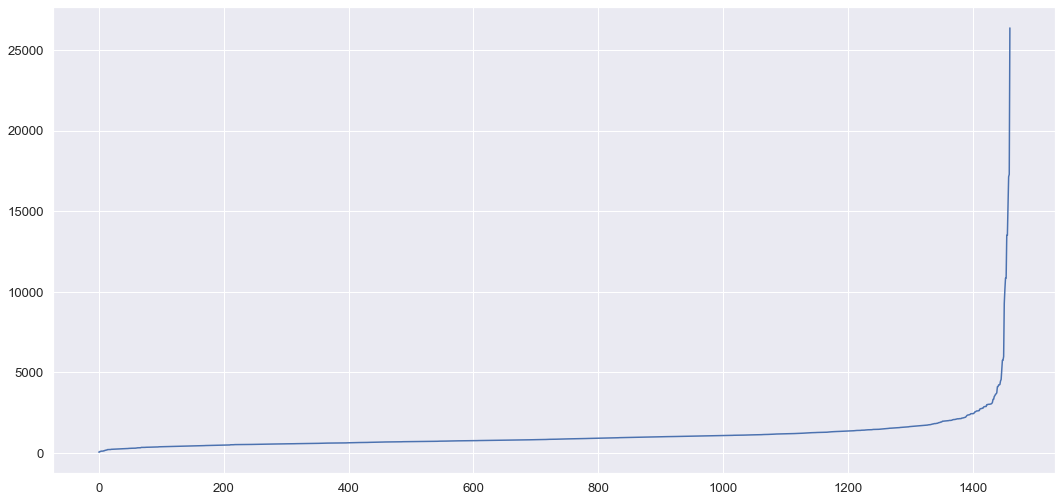

In [92]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(16,8))
plt.plot(distances)

In [93]:
dbscan = DBSCAN(eps=1420, min_samples=20).fit(train_pca)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels=dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [94]:
dbscan.labels_.sum()

48

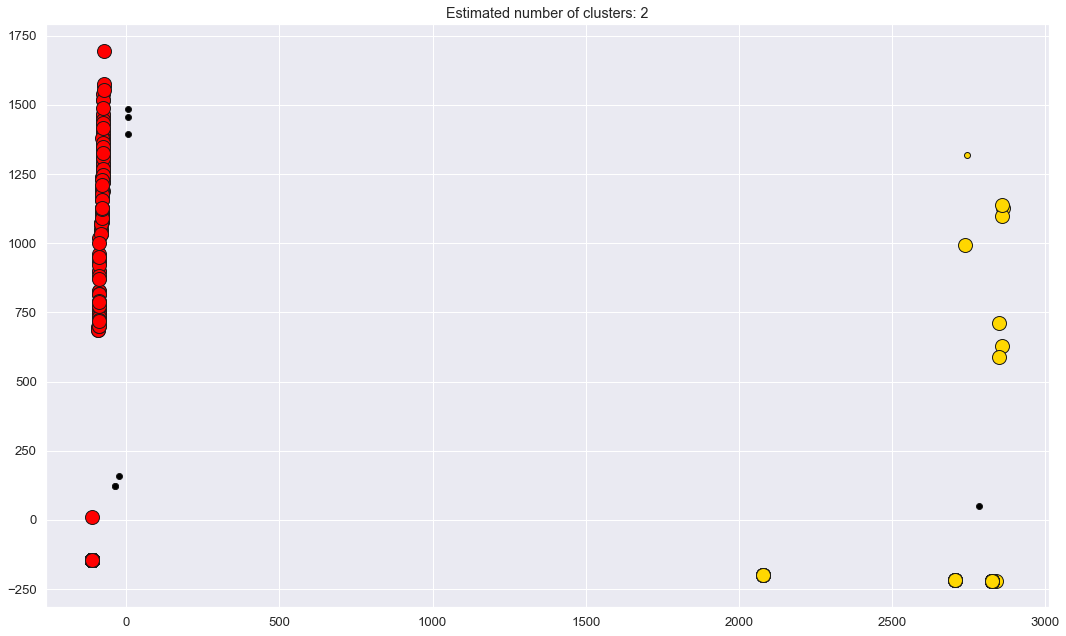

In [95]:
unique_labels = set(labels)
plt.figure(figsize=(16,10))
colors = [plt.cm.prism(each)  for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    xy = train_pca[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = train_pca[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [96]:
unique_labels

{-1, 0, 1}

In [97]:
labels=pd.DataFrame(labels,columns=['Classes'])
print(labels[labels['Classes']==-1])

      Classes
197        -1
810        -1
1170       -1
1182       -1
1298       -1
1386       -1
1423       -1


In [98]:
train=pd.concat([train,labels],axis=1)

In [99]:
train[train.Classes==-1]

Id  MSSubClass  LotFrontage    LotArea    Street  Alley  LotShape  \
197    198           7    23.181519  15.851263  5.271674      1         3   
810    811           0    15.102190  13.811205  5.271674      1         3   
1170  1171           8    14.890046  13.755758  5.271674      1         3   
1182  1183           5    22.181021  14.751523  5.271674      1         0   
1298  1299           5    31.456866  18.058233  5.271674      1         2   
1386  1387           5    15.311586  14.898481  5.271674      1         0   
1423  1424           8    14.457069  15.268763  5.271674      1         0   

      LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
197         0.0            8            3       1918          1990   
810         0.0            6            5       1974          1999   
1170        0.0            6            5       1977          1977   
1182        0.0           10            4       1996          1996   
1298        0.0           10            4       2008          2008   
1386        0.0            7            4       1978          1978   
1423        0.0            6            6       1966          1966   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
197     0.000000   5.498766   2.335065  4.632343  5.218987      6.112247   
810    14.086207  11.456359   5.100238  4.632343  5.218987      6.112247   
1170    0.000000  11.456359   5.100238  2.781865  5.218987      0.000000   
1182    0.000000   5.498766   5.100238  2.781865  5.218987      0.000000   
1298   36.986269   0.000000   5.100238  2.781865  5.218987      1.372290   
1386   18.939833  11.456359   5.100238  2.781865  5.218987      6.112247   
1423    0.000000   5.498766   2.335065  2.781865  5.218987      0.000000   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
197              2      1036.0    193.629659       184.0      140.0   
810              0       663.0    193.629659       377.0        0.0   
1170             0       522.0   1444.251693         0.0      574.0   
1182             2      2096.0   1444.251693         0.0      300.0   
1298             2      5644.0   1444.251693         0.0      466.0   
1386             1       790.0    193.629659       469.0      133.0   
1423             5         0.0   1444.251693         0.0      697.0   

      TotalBsmtSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  \
197        1360.0          2   46.910889  5.594620      1360      4.792411   
810        1040.0          1   46.910889  5.572166         0      0.000000   
1170       1096.0          4   46.910889  5.478841         0      0.000000   
1182       2396.0          0   46.910889  5.923584      2065      0.000000   
1298       6110.0          0   46.910889  6.289153       950      0.000000   
1386       1392.0          4   46.910889  5.608253      1392      0.000000   
1423        697.0          4   46.910889  5.680266       626      0.000000   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
197    7.797760           1.0           1.0         2         0             4   
810    6.981778           1.0           0.0         1         1             3   
1170   6.832623           1.0           0.0         1         0             3   
1182   8.138686           1.0           0.0         3         1             4   
1298   8.355353           2.0           0.0         2         1             3   
1386   7.693105           1.0           0.0         3         1             5   
1423   7.472027           0.0           0.0         2         0             4   

      KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
197        0.75096     5.077704             8      30.831           1   
810        0.75096     5.077704             5      30.831           1   
1170       0.75096    10.302990             6      30.831           1   
1182       0.75096     0.000000            10      30.831           2   
1298       0.

In [100]:
train.drop([197,810,1170,1182,1298,1386,1423],axis=0,inplace=True)

In [101]:
print(best_columns)
print(len(best_columns))

['OverallQual', 'Total_Square_Feet', 'GrLivArea', 'GarageCars', 'Total_Bath', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Foundation_PConc', 'exists_fireplace', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'OpenPorchSF', 'Neighborhood_NridgHt', 'Total_Porch_Area', 'LotArea', 'BsmtFinSF1', 'SaleType_New', 'SaleCondition_Partial', 'WoodDeckSF', 'LotFrontage', 'MasVnrType_Stone', 'Neighborhood_NoRidge', '2ndFlrSF', 'Exterior2nd_VinylSd', 'Exterior1st_VinylSd', 'Foundation_CBlock', 'MasVnrType_None', 'GarageType_Detchd', 'HeatingQC', 'GarageFinish', 'old_house', 'KitchenQual', 'ExterQual']
39


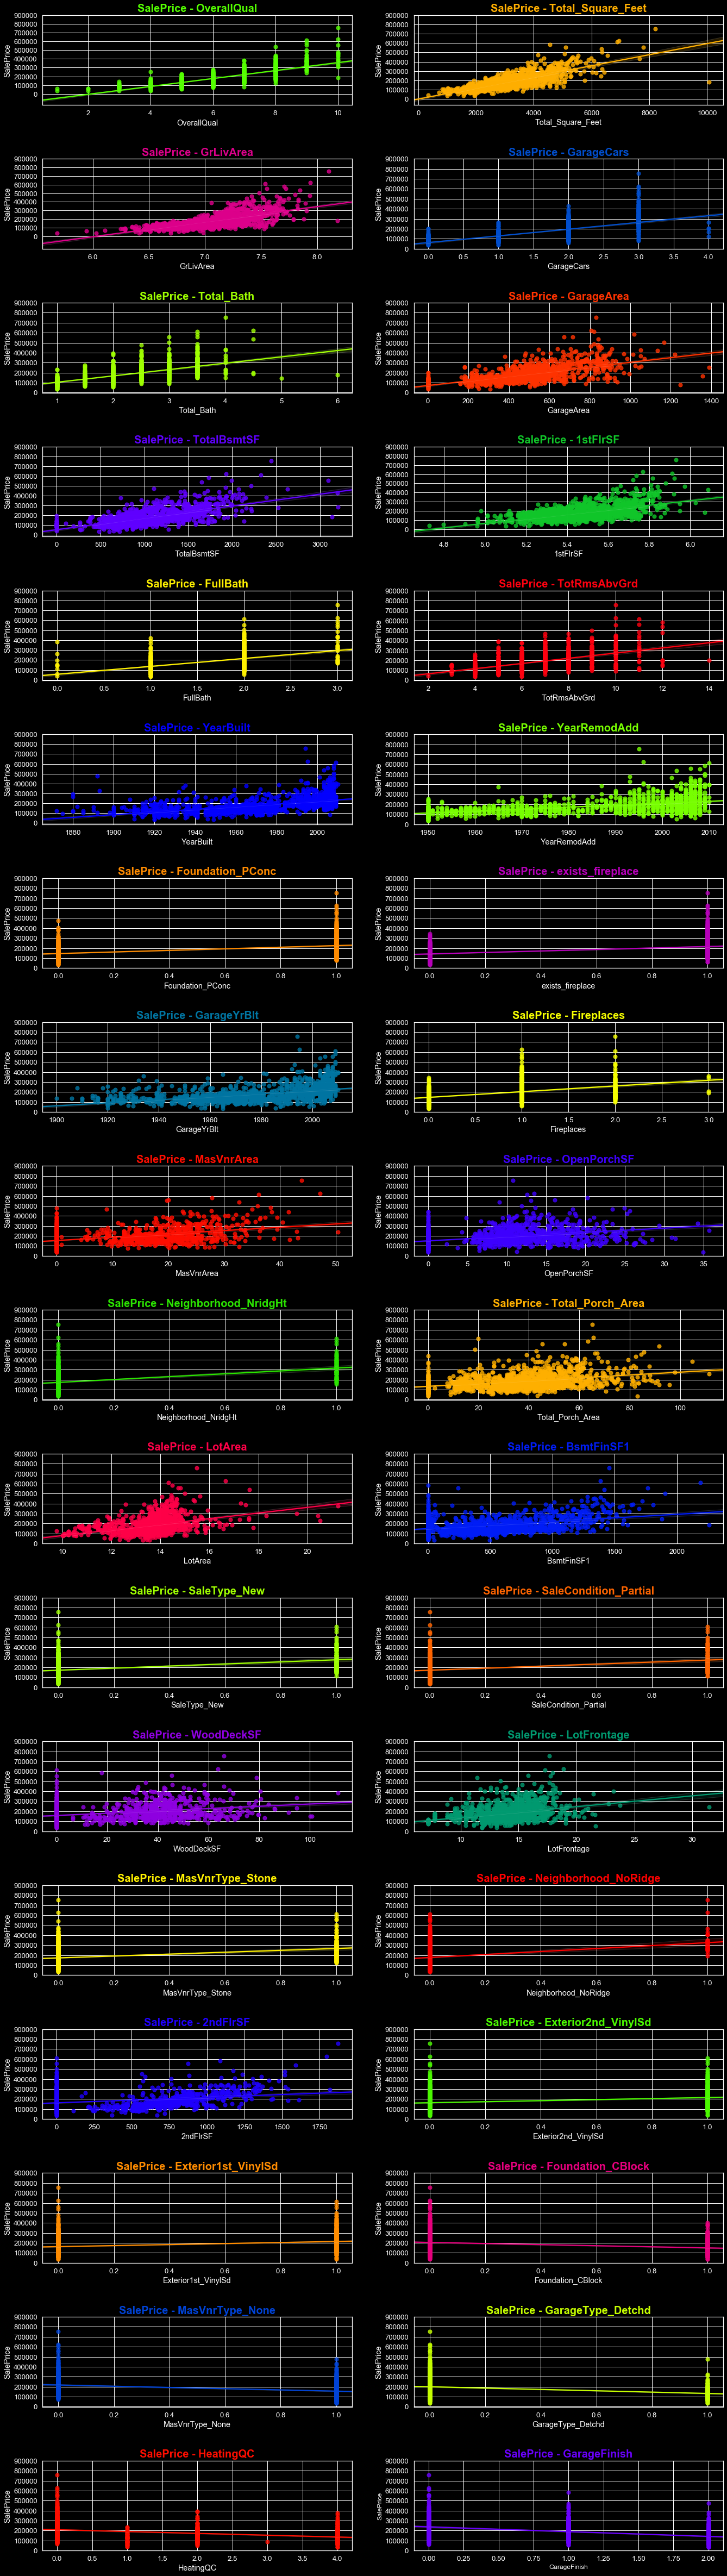

In [102]:
plt.style.use('dark_background')
fig, axes = plt.subplots(18, 2,figsize=(20,80))
fig.subplots_adjust(hspace=0.6)
colors=[plt.cm.prism_r(each) for each in np.linspace(0, 1, len(best_columns))]
for i,ax,color in zip(best_columns,axes.flatten(),colors):
    sns.regplot(x=train[i], y=train["SalePrice"], fit_reg=True,marker='o',scatter_kws={'s':50,'alpha':0.8},color=color,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('SalePrice'+' - '+str(i),color=color,fontweight='bold',size=20)

In [103]:
"""plt.style.use('ggplot')
fig, axes = plt.subplots(18, 2,figsize=(20,60))
fig.subplots_adjust(hspace=0.8)
sns.set(font_scale=1.2)
colors=[plt.cm.prism_r(each) for each in np.linspace(0, 1, len(best_columns))]
for i,ax,color in zip(best_columns,axes.flatten(),colors):
    sns.regplot(x=train[i], y=train["SalePrice_Log1p"], fit_reg=True,marker='o',scatter_kws={'s':50,'alpha':0.7},color=color,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice_Log1p',fontsize=12)
    ax.set_title('SalePrice_Log1p'+' - '+str(i),color=color,fontweight='bold',size=20)"""

'plt.style.use(\'ggplot\')\nfig, axes = plt.subplots(18, 2,figsize=(20,60))\nfig.subplots_adjust(hspace=0.8)\nsns.set(font_scale=1.2)\ncolors=[plt.cm.prism_r(each) for each in np.linspace(0, 1, len(best_columns))]\nfor i,ax,color in zip(best_columns,axes.flatten(),colors):\n    sns.regplot(x=train[i], y=train["SalePrice_Log1p"], fit_reg=True,marker=\'o\',scatter_kws={\'s\':50,\'alpha\':0.7},color=color,ax=ax)\n    plt.xlabel(i,fontsize=12)\n    plt.ylabel(\'SalePrice_Log1p\',fontsize=12)\n    ax.set_title(\'SalePrice_Log1p\'+\' - \'+str(i),color=color,fontweight=\'bold\',size=20)'

In [104]:
train.shape

(1453, 234)

In [105]:
#data before removing of the outliers
train_before_outlier = train.copy()

In [106]:
#Removing Outliers
train = train.drop(train[(train.OverallQual==4) & (train.SalePrice>200000)].index)
train = train.drop(train[(train.OverallQual==10) & (train.SalePrice<200000)].index)
train = train.drop(train[(train.Total_Square_Feet>=10000) & (train.SalePrice<200000)].index)
train = train.drop(train[(train.Total_Square_Feet<3000) & (train.SalePrice>375000)].index)
train = train.drop(train[(train.GrLivArea>4500) & (train.SalePrice<200000)].index)
train = train.drop(train[(train.GrLivArea<3000) & (train.SalePrice>575000)].index)
train = train.drop(train[(train.GarageArea>1200) & (train.SalePrice<165000)].index)
train = train.drop(train[(train.Total_Bath.isin([5,6])) & (train.SalePrice<200000)].index)
train = train.drop(train[(train.TotRmsAbvGrd==10) & (train.SalePrice>700000)].index)
train = train.drop(train[(train.YearBuilt<1900) & (train.SalePrice>250000)].index)
train = train.drop(train[(train.YearBuilt>2000) & (train.SalePrice<100000)].index)
train = train.drop(train[(train.YearRemodAdd<1970) & (train.SalePrice>350000)].index)
train = train.drop(train[(train.MasVnrArea>=1400) & (train.SalePrice<250000)].index)
train = train.drop(train[(train.GarageYrBlt<1960) & (train.SalePrice>340000)].index)
train = train.drop(train[(train.Total_Porch_Area>600) & (train.SalePrice<50000)].index)
train = train.drop(train[(train.LotFrontage>150) & (train.SalePrice<100000)].index)
train = train.drop(train[(train.GarageFinish.isin([1,2])) & (train.SalePrice>470000)].index)
train = train.drop(train[(train.old_house==0) & (train.SalePrice<100000)].index)
train = train.drop(train[(train.old_house==1) & (train.SalePrice>400000)].index)
train = train.drop(train[(train.KitchenQual==2) & (train.SalePrice>600000)].index)
train = train.drop(train[(train.KitchenQual==3) & (train.SalePrice>360000)].index)
train = train.drop(train[(train.ExterQual==2) & (train.SalePrice>550000)].index)


train = train[train.GarageArea * train.GarageCars < 3700]
train = train[(train.FullBath + (train.HalfBath*0.5) + train.BsmtFullBath + (train.BsmtHalfBath*0.5))<5]

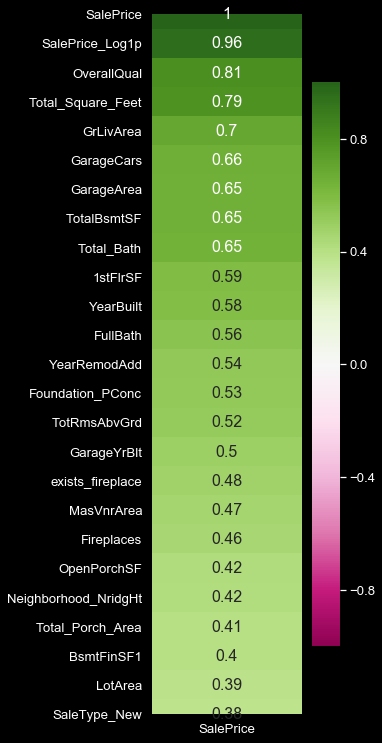

In [107]:
plt.style.use('dark_background')
corr1_new_train=train.corr()
plt.figure(figsize=(3,12))
sns.heatmap(corr1_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(25),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sns.set(font_scale=1.5)

In [108]:
#train.isnull().sum()
#test.isnull().sum()

In [109]:
del test['SalePrice']

In [110]:
train.head()

Id  MSSubClass  LotFrontage    LotArea    Street  Alley  LotShape  \
0   1           5    13.668864  13.424522  5.271674      1         3   
1   2           0    15.311586  13.694528  5.271674      1         3   
2   3           5    14.011693  14.034135  5.271674      1         0   
3   4           6    13.079139  13.683422  5.271674      1         0   
4   5           5    15.722536  14.550144  5.271674      1         0   

   LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0        0.0            7            4       2003          2003   19.509968   
1        0.0            6            7       1976          1976    0.000000   
2        0.0            7            4       2001          2002   17.835998   
3        0.0            7            4       1915          1970    0.000000   
4        0.0            8            4       2000          2000   25.518159   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0   5.498766   5.100238  2.781865  5.218987      6.112247             2   
1  11.456359   5.100238  2.781865  5.218987      1.372290             0   
2   5.498766   5.100238  2.781865  5.218987      3.429154             2   
3  11.456359   5.100238  2.781865  1.280547      6.112247             0   
4   5.498766   5.100238  2.781865  5.218987      0.000000             2   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0       706.0   1444.251693         0.0      150.0        856.0          0   
1       978.0   1444.251693         0.0      284.0       1262.0          0   
2       486.0   1444.251693         0.0      434.0        920.0          0   
3       216.0   1444.251693         0.0      540.0        756.0          2   
4       655.0   1444.251693         0.0      490.0       1145.0          0   

   CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0   46.910889  5.318378       854           0.0   7.234117           1.0   
1   46.910889  5.550625         0           0.0   6.947213           0.0   
2   46.910889  5.362014       866           0.0   7.275134           1.0   
3   46.910889  5.388290       756           0.0   7.237971           1.0   
4   46.910889  5.493030      1053           0.0   7.470743           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0         2         1             3       0.75096     5.077704   
1           1.0         2         0             3       0.75096    10.302990   
2           0.0         2         1             3       0.75096     5.077704   
3           0.0         1         0             3       0.75096     5.077704   
4           0.0         2         1             4       0.75096     5.077704   

   TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageYrBlt  \
0             8      30.831           0            3       2003.0   
1             6      30.831           1            5       1976.0   
2             6      30.831           1            5       2001.0   
3             7      30.831           1            2       1998.0   
4             9      30.831           1            5       2000.0   

   GarageFinish  GarageCars  GarageArea  GarageQual   GarageCond  PavedDrive  \
0             1         2.0       548.0   23.441187  2952.403348   10.465796   
1             1         2.0       460.0   23.441187  2952.403348   10.465796   
2             1         2.0       608.0   23.441187  2952.403348   10.465796   
3             2         3.0       642.0   23.441187  2952.403348   10.465796   
4             1         3.0       836.0   23.441187  2952.403348   10.465796   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0    0.000000    12.009559       0.000000        0.0          0.0       0.0   
1   56.339196     0.000000       0.000000        0.0          0.0       0.0   
2    0.000000     9.849185       0.000000        0.0          0.0       0.0   
3    0.000000     8.92174

# Model

In [112]:
X=train.drop(['SalePrice','SalePrice_Log1p','Classes'],axis=1)
y=train.SalePrice_Log1p

In [113]:
def overfit_reducer(df):
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.9:
            overfit.append(i)
    overfit = list(overfit)
    return overfit
overfitted_features = overfit_reducer(X)
print(overfitted_features)

['PoolArea', 'PoolQC', 'exists_pool', 'Utilities_AllPub', 'Utilities_NoSeWa', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Heating_Floor', 'Electrical_Mix', 'MiscFeature_TenC']


In [114]:
len(overfitted_features)

21

In [115]:
print(X.shape)
print(test.shape)

(1433, 231)
(1459, 231)


In [116]:
X.drop(overfitted_features,axis=1,inplace=True)
test.drop(overfitted_features,axis=1,inplace=True)
print('X.shape',X.shape)
print('test.shape',test.shape)

X.shape (1433, 210)
test.shape (1459, 210)


In [117]:
std_scaler=StandardScaler()
rbst_scaler=RobustScaler()
power_transformer=PowerTransformer()
X_std=std_scaler.fit_transform(X)
X_rbst=rbst_scaler.fit_transform(X)
X_pwr=power_transformer.fit_transform(X)

test_std=std_scaler.transform(test)
test_rbst=rbst_scaler.transform(test)
test_pwr=power_transformer.transform(test)

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.1,random_state=52)
print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)

X_train Shape : (1289, 210)
X_test Shape : (144, 210)
y_train Shape : (1289,)
y_test Shape : (144,)


In [119]:
lgb_regressor = lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035, n_estimators=2177, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, 
                                feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1)
lgb_regressor.fit(X_train, y_train)
y_head = lgb_regressor.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('-'*10+'LGBM'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------LGBM----------
R square Accuracy:  0.8899866431630371
Mean Absolute Error Accuracy:  0.08596998887624174
Mean Squared Error Accuracy:  0.02106489853670299


In [120]:
gb_reg = GradientBoostingRegressor(n_estimators=1992, learning_rate=0.03005, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=14, loss='huber', random_state =42)
gb_reg.fit(X_train, y_train)
y_head=gb_reg.predict(X_test)
print('-'*10+'GBR'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------GBR----------
R square Accuracy:  0.8817212644037845
Mean Absolute Error Accuracy:  0.08242411824983044
Mean Squared Error Accuracy:  0.022647518774253788


In [121]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

alphas=[1e-9,1e-8,1e-7,1e-6]

ridgecv_reg= make_pipeline(RidgeCV(alphas=alphas, cv=kfolds))
ridgecv_reg.fit(X_train, y_train)
y_head=ridgecv_reg.predict(X_test)
print('-'*10+'RidgeCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------RidgeCV----------
R square Accuracy:  0.890790657801035
Mean Absolute Error Accuracy:  0.09091595386440728
Mean Squared Error Accuracy:  0.020910949168568095


In [122]:
kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

lassocv_reg= make_pipeline(LassoCV(alphas=alphas, cv=kfolds))
lassocv_reg.fit(X_train, y_train)
y_head=lassocv_reg.predict(X_test)
print('-'*10+'LassoCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------LassoCV----------
R square Accuracy:  0.8907735037080375
Mean Absolute Error Accuracy:  0.09092071386275058
Mean Squared Error Accuracy:  0.02091423376271983


In [123]:
kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006]
l1ratio=[0.87, 0.9,0.92, 0.95,0.97, 0.99, 1]

elasticv_reg= make_pipeline(ElasticNetCV(alphas=alphas, cv=kfolds, l1_ratio=l1ratio))
elasticv_reg.fit(X_train, y_train)
y_head=elasticv_reg.predict(X_test)
print('-'*10+'ElasticNetCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------ElasticNetCV----------
R square Accuracy:  0.8969534299072758
Mean Absolute Error Accuracy:  0.08829612360240595
Mean Squared Error Accuracy:  0.019730927279815316


In [124]:
estimators = [('lgbm', lgb_regressor),
              ('gbr', gb_reg),   
              ('lasso', lassocv_reg),   
              ('ridge', ridgecv_reg),   
              ('elasticnet', elasticv_reg)]

stack_reg=StackingRegressor(estimators=estimators,final_estimator=ExtraTreesRegressor(n_estimators=50),n_jobs=-1)
stack_reg.fit(X_train, y_train)
y_head=stack_reg.predict(X_test)
print('-'*10+'StackingRegressor'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------StackingRegressor----------
R square Accuracy:  0.8858278632184408
Mean Absolute Error Accuracy:  0.09160227161562812
Mean Squared Error Accuracy:  0.021861204367996035


In [125]:
y_head=pd.DataFrame(y_head,columns=['Predict'])
y_test.reset_index(drop=True,inplace=True)
y_test_y_head=pd.concat([y_test,y_head],axis=1)
y_test_y_head.head(10)

SalePrice_Log1p    Predict
0        11.976666  12.084501
1        11.763692  11.626623
2        12.091789  12.205812
3        12.672950  12.826808
4        11.863589  11.843608
5        12.367345  12.299038
6        11.350418  11.427150
7        11.652696  11.339511
8        11.740069  11.664992
9        11.774528  11.788293

In [126]:
#FINALIZE

In [127]:
reg1 = xgb.XGBRegressor()
reg1.fit(X_train,y_train)
y_head=reg1.predict(X_test)
print('-'*10+'XGB'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------XGB----------
R square Accuracy:  0.8565841685430415
Mean Absolute Error Accuracy:  0.09735164128455448
Mean Squared Error Accuracy:  0.02746066500520327


In [128]:
reg2=lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035, n_estimators=2177, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, 
                                feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1)
reg2.fit(X_train, y_train)
y_head=reg2.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('-'*10+'LGBM'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------LGBM----------
R square Accuracy:  0.8899866431630371
Mean Absolute Error Accuracy:  0.08596998887624174
Mean Squared Error Accuracy:  0.02106489853670299


In [129]:
reg3 = RandomForestRegressor(n_estimators = 2020,random_state = 2020)
reg3.fit(X_train,y_train)
y_head = reg3.predict(X_test)
print('-'*10+'RabdomForest'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------RabdomForest----------
R square Accuracy:  0.8486485679582868
Mean Absolute Error Accuracy:  0.10110621280562833
Mean Squared Error Accuracy:  0.028980140693899776


In [130]:
reg4 = GradientBoostingRegressor(n_estimators=1992, learning_rate=0.03005, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=14, loss='huber', random_state =42)
reg4.fit(X_train, y_train)
y_head=reg4.predict(X_test)
print('-'*10+'GBR'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------GBR----------
R square Accuracy:  0.8817212644037845
Mean Absolute Error Accuracy:  0.08242411824983044
Mean Squared Error Accuracy:  0.022647518774253788


In [131]:
kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006]
l1ratio=[0.87, 0.9,0.92, 0.95,0.97, 0.99, 1]

reg5= make_pipeline(ElasticNetCV(alphas=alphas, cv=kfolds, l1_ratio=l1ratio))
reg5.fit(X_train, y_train)
y_head=reg5.predict(X_test)
print('-'*10+'ElasticNetCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------ElasticNetCV----------
R square Accuracy:  0.8969534299072758
Mean Absolute Error Accuracy:  0.08829612360240595
Mean Squared Error Accuracy:  0.019730927279815316


In [132]:
test_pred_1=reg1.predict(test_pwr)
test_pred_2=reg2.predict(test_pwr)
test_pred_3=reg3.predict(test_pwr)
test_pred_4=reg4.predict(test_pwr)
test_pred_5=reg5.predict(test_pwr)

In [133]:
test_pred_1=pd.DataFrame(test_pred_1,columns=['SalePrice'])
test_pred_2=pd.DataFrame(test_pred_2,columns=['SalePrice'])
test_pred_3=pd.DataFrame(test_pred_3,columns=['SalePrice'])
test_pred_4=pd.DataFrame(test_pred_4,columns=['SalePrice'])
test_pred_5=pd.DataFrame(test_pred_5,columns=['SalePrice'])


In [134]:
test_pred_1.SalePrice =np.floor(np.expm1(test_pred_1.SalePrice))
test_pred_2.SalePrice =np.floor(np.expm1(test_pred_2.SalePrice))
test_pred_3.SalePrice =np.floor(np.expm1(test_pred_3.SalePrice))
test_pred_4.SalePrice =np.floor(np.expm1(test_pred_4.SalePrice))
test_pred_5.SalePrice =np.floor(np.expm1(test_pred_5.SalePrice))

In [135]:
#pd.concat([test_pred_1,test_pred_2,test_pred_3,test_pred_4,test_pred_5],axis = 1)

In [136]:
print("reg1 = xgb, reg2 = lgb, reg3 = randomforest, reg4 = gradiesntboosting, reg5 = elasticnetcv")

reg1 = xgb, reg2 = lgb, reg3 = randomforest, reg4 = gradiesntboosting, reg5 = elasticnetcv


In [137]:
final_pred= (test_pred_2*0.35) + (test_pred_4 * 0.3) + (test_pred_5 *0.35) 
final_pred.head()

SalePrice
0  124179.55
1  160923.20
2  186415.30
3  202277.60
4  195063.65

In [138]:
sample_sub['SalePrice']=final_pred

In [139]:
sample_sub.to_csv('HousePriceSubmission.csv',index=False)

In [ ]:
#Done:)